In [27]:
from rlagent.agent import Agent
from rlagent.simulation import Simulator
from torch import nn

## Acrobot Model

#### Agent Configuration

In [28]:
agent_config = {
    'action_cnt':3,
    'feature_cnt':6,
    'gamma':0.99999,
    'memory_size':50000,
    'batch_size':500,
    'batch_cnt':10,
    'lr':0.001,
    'epsilon':0.90,
    'epsilon_decay':0.997,
    'epsilon_min':0.10,
    'smoothing':0.25,
    'weight_filepath':'model_weights/acrobot.pth'
}

#### State Transition Model

In [29]:
class StateTransitionModel(nn.Module):
    def __init__(self,feature_cnt,action_cnt):
        super(StateTransitionModel, self).__init__()
        
        hidden_layer_cnt = 128
        hidden_layer2_cnt = 32
        
        self.fc1 = nn.Linear(feature_cnt,hidden_layer_cnt)
        self.fc2 = nn.Linear(hidden_layer_cnt,action_cnt)
        #self.fc3 = nn.Linear(hidden_layer2_cnt,action_cnt)
        
        self.dropout = nn.Dropout(p=0.5)
    
    def forward(self,x):
        x = nn.functional.relu(self.fc1(x))
        #x = self.dropout(x)
        #x = nn.functional.relu(self.fc2(x))
        x = self.fc2(x)
        return x

agent_config['transition_model'] = StateTransitionModel(6,3)

#### Simulation Configuration

In [30]:
simulator_config = {
    #'gym_model_name':'CartPole-v1',
    'train_model':True,
    'training_epochs':2000,
    'visualize_test':True,
    'score_model_performance':True,
    'early_stopping_condition':(5,0),
    'performance_plot_dir':'',
    'plot_filepath':'plots/acrobot_plots.png',
    'episode_cnt':1
}

In [31]:
agent = Agent(**agent_config)

sim = Simulator(gym_model_name = 'Acrobot-v1',agent=agent,**simulator_config)

{'action_cnt': 3, 'feature_cnt': 6, 'gamma': 0.99999, 'memory_size': 50000, 'batch_size': 500, 'batch_cnt': 10, 'lr': 0.001, 'epsilon': 0.9, 'epsilon_decay': 0.997, 'epsilon_min': 0.1, 'smoothing': 0.25, 'weight_filepath': 'model_weights/acrobot.pth', 'transition_model': StateTransitionModel(
  (fc1): Linear(in_features=6, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=3, bias=True)
  (dropout): Dropout(p=0.5, inplace=False)
)}


Epoch: 25/2000, Rewards: (25, -500.0), Loss: 0.06674683019518853,Epsilon: 0.832370395618682, Memory: 13000
Epoch: 50/2000, Rewards: (50, -500.0), Loss: 0.11128846406936646,Epsilon: 0.7721391680624109, Memory: 25344
Epoch: 75/2000, Rewards: (75, -500.0), Loss: 0.1453845016658306,Epsilon: 0.7162663376716696, Memory: 37844
Epoch: 100/2000, Rewards: (100, -500.0), Loss: 0.28449895828962324,Epsilon: 0.6644365260850469, Memory: 50000
Epoch: 125/2000, Rewards: (125, -500.0), Loss: 0.42933871746063235,Epsilon: 0.6163571760625357, Memory: 50000
Epoch: 150/2000, Rewards: (150, -93.7), Loss: 0.6412902891635894,Epsilon: 0.5717569001243582, Memory: 50000
Epoch: 175/2000, Rewards: (175, -91.9), Loss: 0.9389120727777481,Epsilon: 0.5303839486840786, Memory: 50000
Epoch: 200/2000, Rewards: (200, -118.6), Loss: 1.18054341673851,Epsilon: 0.4920047890292717, Memory: 50000
Epoch: 225/2000, Rewards: (225, -266.8), Loss: 1.8159322381019591,Epsilon: 0.45640278712869853, Memory: 50000
Epoch: 250/2000, Rewards:

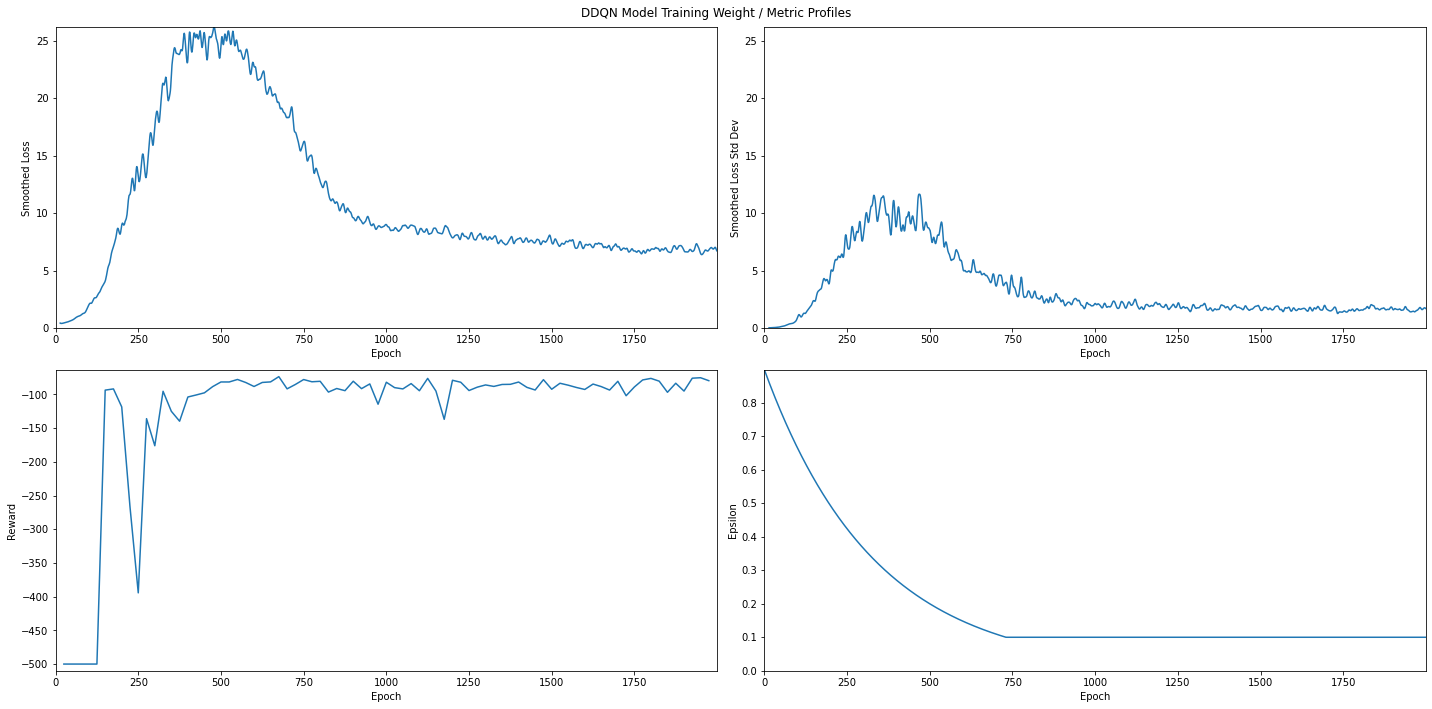

In [32]:
sim.run()

In [25]:
sim.train_model=False
sim.visualize_test=True
sim.run()

Average trial score: -91.9±13.232157798333573


In [38]:
sim.run_trial(use_epsilon=False,use_visualization=True)

-175.0